In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    expA = np.exp(Z.dot(W2) + b2)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

def cost(T, Y):
    tot = T * np.log(Y)
    return tot.sum()

def derivative_w2(Z, T, Y):
    return Z.T.dot(T - Y)

def derivative_b2(T, Y):
    return (T - Y).sum(axis=0)

def derivative_w1(X, Z, T, Y, W2):
    return X.T.dot((T - Y).dot(W2.T) * Z * (1 - Z))

def derivative_b1(T, Y, W2, Z):
    return ((T - Y).dot(W2.T) * Z * (1 - Z)).sum(axis=0)


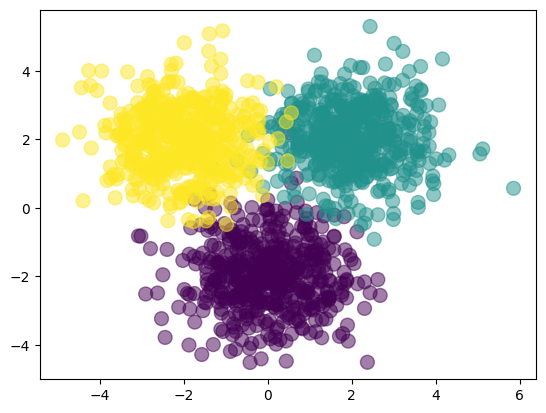

epoch 0	cost: -1508	class. rate: 0.398
epoch 1000	cost: -1477	class. rate: 0.417
epoch 2000	cost: -1448	class. rate: 0.430
epoch 3000	cost: -1421	class. rate: 0.447
epoch 4000	cost: -1396	class. rate: 0.462
epoch 5000	cost: -1372	class. rate: 0.482
epoch 6000	cost: -1350	class. rate: 0.498
epoch 7000	cost: -1329	class. rate: 0.515
epoch 8000	cost: -1309	class. rate: 0.529
epoch 9000	cost: -1290	class. rate: 0.541
epoch 10000	cost: -1272	class. rate: 0.552
epoch 11000	cost: -1255	class. rate: 0.561
epoch 12000	cost: -1238	class. rate: 0.573
epoch 13000	cost: -1222	class. rate: 0.580
epoch 14000	cost: -1207	class. rate: 0.588
epoch 15000	cost: -1192	class. rate: 0.592
epoch 16000	cost: -1178	class. rate: 0.598
epoch 17000	cost: -1164	class. rate: 0.603
epoch 18000	cost: -1150	class. rate: 0.618
epoch 19000	cost: -1138	class. rate: 0.626
epoch 20000	cost: -1125	class. rate: 0.648
epoch 21000	cost: -1113	class. rate: 0.671
epoch 22000	cost: -1101	class. rate: 0.708
epoch 23000	cost: -1089	

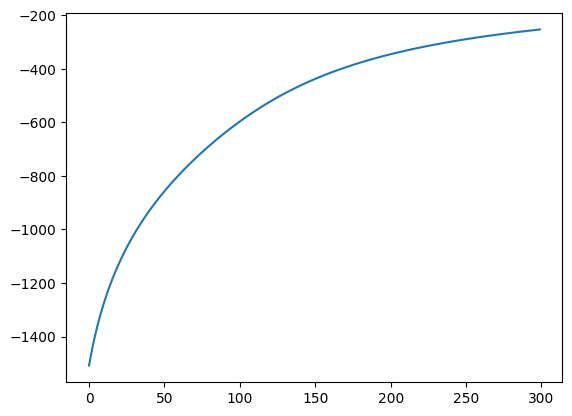

In [17]:
def main():
    Nclass = 500  # samples in each class
    D = 2  # dimensions of X
    M = 3  # hidden units
    K = 3  # classes

    X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
    X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
    X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])
    X = np.vstack([X1, X2, X3])

    Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
    N = len(Y)

    T = np.zeros((N, K))
    for i in range(N):
        T[i, Y[i]] = 1  # one hot enconding for the targets

    # let's see what the data looks like
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, alpha=0.5)
    plt.show()

    # randomly initialize weights
    W1 = np.random.randn(D, M)
    b1 = np.random.randn(M)
    W2 = np.random.randn(M, K)
    b2 = np.random.randn(K)

    # training parameters
    learning_rate = 1e-7
    costs = []
    epochs = 300000
    for epoch in range(epochs):
        output, hidden = forward(X, W1, b1, W2, b2)
        if epoch % 1000 == 0:
            c = cost(T, output)
            P = np.argmax(output, axis=1)
            r = classification_rate(Y, P)
            print(f"epoch {epoch}\tcost: {c:.0f}\tclass. rate: {r:.3f}")
            costs.append(c)

        # gradient ascent
        W2 += learning_rate*derivative_w2(hidden, T, output)
        b2 += learning_rate*derivative_b2(T, output)
        W1 += learning_rate*derivative_w1(X, hidden, T, output, W2)
        b1 += learning_rate*derivative_b1(T, output, W2, hidden)

    plt.plot(costs)
    plt.show()


if __name__ == '__main__':
    main()